<a href="https://colab.research.google.com/github/judyfive/TEST_REPO/blob/main/%EA%B0%9C%EC%9D%B8_%ED%94%84%EB%A1%9C%EC%A0%9D%ED%8A%B8_Weapon_Detection_and_Classification_LG_CNS_%ED%99%8D%EB%8B%A8%EB%B9%84.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Weapon Classification**

```
# 코드로 형식 지정됨
```



In [ ]:
!git clone https://github.com/ari-dasci/OD-WeaponDetection 

# 1. 불러올 때마다 오래걸립니다. 매번 git clone을 해서 데이터를 가져오는 수 밖에 없나요? 

Cloning into 'OD-WeaponDetection'...
remote: Enumerating objects: 50752, done.
remote: Counting objects: 100% (11670/11670), done.
remote: Compressing objects: 100% (10238/10238), done.
remote: Total 50752 (delta 10), reused 11653 (delta 2), pack-reused 39082
Receiving objects: 100% (50752/50752), 2.26 GiB | 44.70 MiB/s, done.
Resolving deltas: 100% (10977/10977), done.
Checking out files: 100% (63128/63128), done.


In [ ]:
import numpy as np
import pandas as pd
import os
import cv2
import glob
import os.path as path
from scipy import misc

In [ ]:
import tensorflow as tf
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Conv2D,MaxPool2D,Dropout
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
IMAGE_PATH='./OD-WeaponDetection/Weapons and similar handled objects/Sohas_weapon-Classification/'
file_paths=glob.glob(path.join(IMAGE_PATH,'*.jpg'))
images=[misc.imread(path) for path in file_paths]
images=np.asarray(images)

In [ ]:
# 2. 원본 이미지 사이즈(예: 32*32)를 확인해보고 싶은데 에러가 납니다. 
image_size=np.asarray([images.shape[0],images.shape[1],images.shape[2]])
print(image_size)

IndexError: ignored

In [ ]:
groups_folder_path = './OD-WeaponDetection/Weapons and similar handled objects/Sohas_weapon-Classification/'
categories = ["billete","knife","monedero","pistol","smartphone","tarjeta"]
num_classes = len(categories)

In [ ]:
# 이미지 조정, 전체 데이터에 라벨 붙이기
image_w = 64
image_h = 64
  
X = []
Y = []
  
for idex, categorie in enumerate(categories):
    label = [0 for i in range(num_classes)]
    label[idex] = 1
    image_dir = groups_folder_path + categorie + '/'
  
    for top, dir, f in os.walk(image_dir):
        for filename in f:
            print(image_dir+filename)
            img = cv2.imread(image_dir+filename)
            img = cv2.resize(img, None, fx=image_w/img.shape[0], fy=image_h/img.shape[1])
            X.append(img/256)
            Y.append(label)
 
X = np.array(X)
Y = np.array(Y)

In [ ]:
print(len(X),len(Y))

9544 9544


In [ ]:
# 3. 각 각 category별(예: knife, pistol 등) 몇 개의 데이터가 있는지 어떻게 확인하나요?

AttributeError: ignored

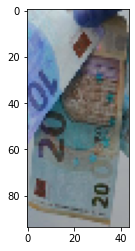

In [ ]:
# 4. 위의 코드에서 이미지 크기를 조정했는데, 초기에 28로 하니깐 이미지 화질 안 좋아서 (28->32->64)로 조정했습니다. 어느정도로 설정해야 할까요?
# 5. 코드를 실행할때마다 이미지의 순서가 바뀝니다. 왜 그런가요? (예: X[0]의 이미지를 출력하면 다른 이미지가 출력 됩니다)
plt.imshow(X[0])
plt.show()

In [ ]:
# 6. 위 코드에서 이미지 조정 64*64로 한거 아닌가요? 왜 shape이 다르게 나오나요?
X[0].shape

(94, 44, 3)

In [ ]:
print(Y[1])

[1 0 0 0 0 0]


In [ ]:
# 학습, 테스트 데이터 나누기
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,stratify=Y,random_state=42)
xy = (X_train, X_test, Y_train, Y_test)

# X_train: 학습용 이미지 데이터
# Y_train: 학습용 라벨 데이터
# X_test: 테스트용 이미지 데이터
# Y_test: 테스트용 라벨 데이터

np.save("./img_data.npy", xy)
# 7. 이 폴더 안에 데이터를 저장했는데, 폴더 구조에 보면 데이터가 들어가 있지 않습니다.

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


In [ ]:
# 8. 데이터와 라벨 하나의 데이터셋으로 안 합쳐도 되나요? 어떻게 합치나요?
print(len(X_train),len(X_test))

7635 1909


In [ ]:
# 9. input image의 shape이 왜 제대로 안 나오나요? (예: 7635, 64, 64, 3)
print('X_train의 shape:', X_train.shape)
print('Y_train의 shape:', Y_train.shape)
print('X_test의 shape:', X_test.shape)
print('Y_test의 shape:', Y_test.shape)

X_train의 shape: (7635,)
Y_train의 shape: (7635, 6)
X_test의 shape: (1909,)
Y_test의 shape: (1909, 6)


In [ ]:
# 10. 이미지 데이터를 255로 scaling 하려하는데 왜 에러가 나는 건가요? 뭔가 위에서부터 이미지 사이즈 설정이 잘못된 것 같습니다..
X_train =  X_train.astype('float32') / 255.0

ValueError: ignored

In [ ]:
#train_image_generator = ImageDataGenerator(rescale=1./255) 

In [ ]:
#BATCH = 128
#IMG_HEIGHT = 150
#IMG_WIDTH = 150

In [ ]:
#train_data_gen = train_image_generator.flow_from_directory(batch_size=BATCH,
#                                                           directory=X_train,
#                                                           shuffle=True,
#                                                           target_size=(IMG_HEIGHT, IMG_WIDTH),
#                                                           class_mode='categorical')  

In [ ]:
#X_test = X_test.reshape(-1,32*32*3)/255
#y_test = keras.utils.to_categorical(y_test, 10)